In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline
import theano.tensor as T
import scipy.stats as stats
from scipy.interpolate import griddata

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

C:\Users\adam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv("home_data.csv")
df = df[df['zipcode']==98178] # focus on one zipcode area
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
117,4060000240,20140623T000000,205425,2,1.00,880,6780,1.0,0,0,...,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780
126,4058801670,20140717T000000,445000,3,2.25,2100,8201,1.0,0,2,...,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712
273,2976800796,20140925T000000,236000,3,1.00,1300,5898,1.0,0,0,...,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619
281,6874200960,20150227T000000,170000,2,1.00,860,5265,1.0,0,0,...,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775


Standardize predictors

In [4]:
df['grade_std'] = (df['grade']-df['grade'].mean())/df['grade'].std()
df['sqft_living_std'] = (df['sqft_living']-df['sqft_living'].mean())/df['sqft_living'].std()
df['bed_std'] = (df['bedrooms']-df['bedrooms'].mean())/df['bedrooms'].std()
df['sqft_above_std'] = (df['sqft_above']-df['sqft_above'].mean())/df['sqft_above'].std()

In [5]:
df['log_price'] = np.log(df['price'])

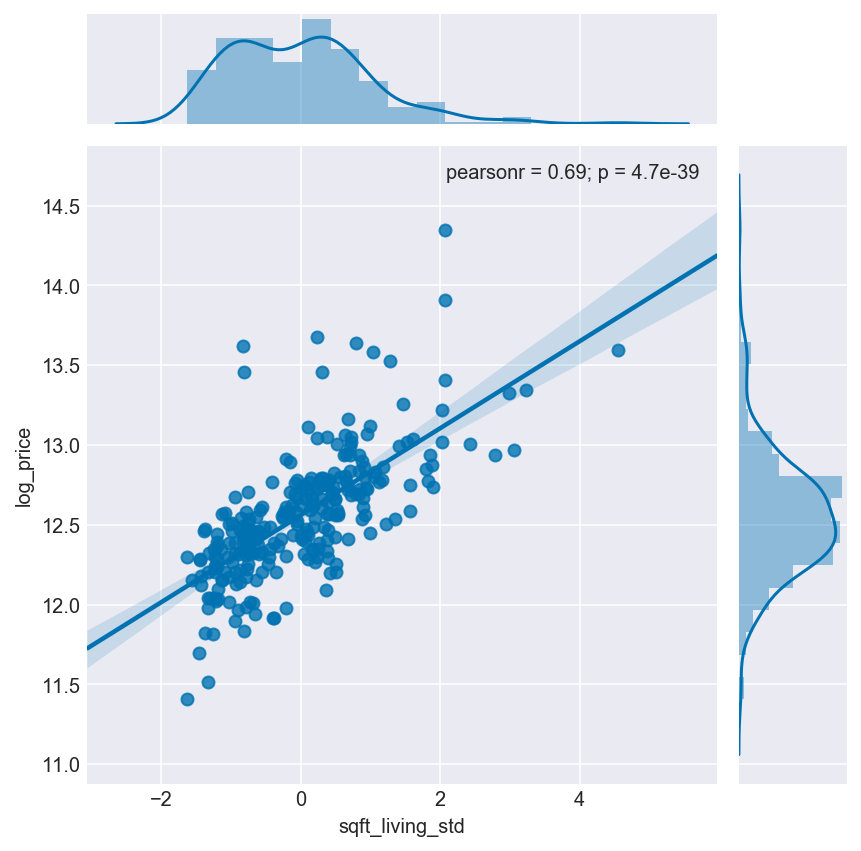

In [109]:
sns.jointplot(x='sqft_living_std', y='log_price', data=df, kind='reg');

**SQFT_Living**

In [7]:
with pm.Model() as model_1_1:
    a = pm.Normal('a', mu=10, sd=5)
    bSQFT = pm.Normal('bSQFT', mu=0, sd=5)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a +  bSQFT * df.sqft_living_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_1_1 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bSQFT, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:32<00:00, 368.72draws/s]


In [8]:
pm.summary(trace_1_1, varnames=['a','bSQFT','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559434,0.017658,0.000160,12.524570,12.594044,12326.860593,1.000213
bSQFT,0.272592,0.017425,0.000142,0.238497,0.307032,10907.314175,0.999960
sigma,0.284510,0.012716,0.000114,0.259506,0.308887,12354.978363,0.999995


**Grade**

In [9]:
with pm.Model() as model_1_2:
    a = pm.Normal('a', mu=10, sd=5)
    bGRADE = pm.Normal('bGRADE', mu=0, sd=5)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a +  bGRADE * df.grade_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_1_2 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bGRADE, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:31<00:00, 381.25draws/s]


In [10]:
pm.summary(trace_1_2, varnames=['a','bGRADE','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559357,0.018574,0.000143,12.523764,12.595576,12504.035604,1.000042
bGRADE,0.254455,0.018877,0.000168,0.217104,0.291737,10916.552555,0.999955
sigma,0.301109,0.013130,0.000115,0.275348,0.326709,12152.472304,1.000279


**Bedrooms**

In [11]:
with pm.Model() as model_1_3:
    a = pm.Normal('a', mu=10, sd=5)
    bBED = pm.Normal('bBED', mu=0, sd=5)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a +  bBED * df.bed_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_1_3 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bBED, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:31<00:00, 384.58draws/s]


In [12]:
pm.summary(trace_1_3, varnames=['a','bBED','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559457,0.022413,0.000216,12.518000,12.604406,11685.356274,0.999928
bBED,0.154010,0.022852,0.000194,0.107603,0.196779,12377.338334,0.999876
sigma,0.363707,0.016144,0.000148,0.333519,0.396372,11555.578556,0.999899


**SQFT_Above**

In [13]:
with pm.Model() as model_1_4:
    a = pm.Normal('a', mu=10, sd=5)
    bSQABV = pm.Normal('bSQABV', mu=0, sd=5)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a +  bSQABV * df.sqft_above_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_1_4 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bSQABV, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:30<00:00, 395.06draws/s]


In [14]:
pm.summary(trace_1_4, varnames=['a','bSQABV','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559090,0.020226,0.000191,12.520098,12.599322,11537.462558,1.000433
bSQABV,0.217085,0.020608,0.000189,0.176913,0.256802,12636.819822,0.999896
sigma,0.329362,0.014314,0.000132,0.302247,0.357760,12458.765604,0.999924


### All

In [15]:
with pm.Model() as model_3:
    a = pm.Normal('a', mu=10, sd=5)
    b = pm.Normal('b', mu=0, sd=1, shape=4)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a + b[0]*df.sqft_living_std + b[1]*df.grade_std + b[2]*df.bed_std + 
                          b[3]*df.sqft_above_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_3 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:50<00:00, 239.28draws/s]


In [16]:
pm.summary(trace_3, varnames=['a','b','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559270,0.016918,0.000156,12.527956,12.593837,10830.081596,0.999877
b__0,0.190265,0.031783,0.000345,0.127298,0.250414,8377.800383,0.999893
b__1,0.118364,0.024330,0.000216,0.071117,0.165622,10446.913288,0.999896
b__2,-0.017665,0.021198,0.000204,-0.060027,0.022332,9206.638784,0.999900
b__3,0.011189,0.026143,0.000267,-0.041682,0.060403,9457.104239,0.999938
sigma,0.272774,0.012431,0.000113,0.248596,0.297081,11517.135466,1.000198


**SQFT_Living and Bedrooms**

In [17]:
with pm.Model() as model_2:
    a = pm.Normal('a', mu=10, sd=5)
    b = pm.Normal('b', mu=0, sd=1, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a + b[0]*df.sqft_living_std + b[1]*df.bed_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_2 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:44<00:00, 272.12draws/s]


In [18]:
pm.summary(trace_2, varnames=['a','b','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559345,0.017779,0.000164,12.524450,12.594457,10132.516964,1.000040
b__0,0.286184,0.022521,0.000320,0.241029,0.328756,4835.827512,0.999875
b__1,-0.022046,0.022361,0.000325,-0.065578,0.022818,4852.519315,1.000130
sigma,0.284456,0.012654,0.000128,0.260626,0.309885,9895.786926,0.999903


**SQFT_Living and Grade**

In [19]:
with pm.Model() as model_2_1:
    a = pm.Normal('a', mu=10, sd=5)
    b = pm.Normal('b', mu=0, sd=1, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a + b[0]*df.sqft_living_std + b[1]*df.grade_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_2_1 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:46<00:00, 257.55draws/s]


In [20]:
pm.summary(trace_2_1, varnames=['a','b','sigma'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,12.559117,0.016701,0.000216,12.526929,12.591710,7249.248741,0.999957
b__0,0.185818,0.024782,0.000352,0.139980,0.236551,5520.497388,1.000239
b__1,0.120889,0.024726,0.000339,0.073099,0.169704,5689.244678,1.000462
sigma,0.272120,0.011918,0.000138,0.248479,0.295176,7297.758637,0.999889


**SQFT_Living and SQFT_Above**

In [21]:
with pm.Model() as model_2_2:
    a = pm.Normal('a', mu=10, sd=5)
    b = pm.Normal('b', mu=0, sd=1, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a + b[0]*df.sqft_living_std + b[1]*df.sqft_above_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_2_2 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:46<00:00, 260.70draws/s]


In [22]:
pm.summary(trace_2_2, varnames=['a','b','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']]

,mean,sd,hpd_2.5,hpd_97.5
a,12.559297,0.017802,12.526404,12.596876
b__0,0.250545,0.026070,0.198323,0.301614
b__1,0.029125,0.026228,-0.022783,0.078944
sigma,0.284337,0.012752,0.260351,0.309775


## Summary

**This might be an issue of multicollinearity:**

In [23]:
print('**SQFT_Living**')
print(pm.summary(trace_1_1, varnames=['a','bSQFT','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']])
print('\n**SQFT_Above**')
print(pm.summary(trace_1_4, varnames=['a','bSQABV','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']])
print('\n**SQFT_Living(b__0) and SQFT_Above (b__1)**')
print(pm.summary(trace_2_2, varnames=['a','b','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']])

**SQFT_Living**
            mean        sd    hpd_2.5   hpd_97.5
a      12.559434  0.017658  12.524570  12.594044
bSQFT   0.272592  0.017425   0.238497   0.307032
sigma   0.284510  0.012716   0.259506   0.308887

**SQFT_Above**
             mean        sd    hpd_2.5   hpd_97.5
a       12.559090  0.020226  12.520098  12.599322
bSQABV   0.217085  0.020608   0.176913   0.256802
sigma    0.329362  0.014314   0.302247   0.357760

**SQFT_Living(b__0) and SQFT_Above (b__1)**
            mean        sd    hpd_2.5   hpd_97.5
a      12.559297  0.017802  12.526404  12.596876
b__0    0.250545  0.026070   0.198323   0.301614
b__1    0.029125  0.026228  -0.022783   0.078944
sigma   0.284337  0.012752   0.260351   0.309775


**1)**
* When `living space` is part of a bivariate regression with `log_price` as outcome, it's slope is 0.27.  
* When `Above space` is part of a bivariate regression with `log_price` as outcome, it's slope is 0.21 with std 0.02

But when `living space` and `Above space` are combined in the multivariate regression with `log_price` as outcome, `Above space` slope is reduced to practically zero (0.029), while `living space` comes closer to zero as well (0.25). Its Standard Deviation also increases by 50% (from 0.017 to 0.026).

These are usually signs of high correlation between predictor variables, `Above space` and `living space` (np.corrcoef = 0.75). We see that both posterior means are closer to zero and their sd has increased by ~ 50%. What happened? Given that living space and Above space contain much of the same information (see correlation below), they are substitutes for one another. As a result, when you include both in a regression, the posterior distribution ends up describing a long ridge of combinations of those predictors, which are equally plausible; Thus, making us believe that none of the predictor variables are important, when in fact, one of them usually is. 

In [24]:
print('**SQFT_Living**')
print(pm.summary(trace_1_1, varnames=['a','bSQFT','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']])
print('\n**Bedrooms**')
print(pm.summary(trace_1_3, varnames=['a','bBED','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']])
print('\n**SQFT_Living(b__0) and Bedrooms (b__1)**')
print(pm.summary(trace_2, varnames=['a','b','sigma'])[['mean','sd','hpd_2.5','hpd_97.5']])

**SQFT_Living**
            mean        sd    hpd_2.5   hpd_97.5
a      12.559434  0.017658  12.524570  12.594044
bSQFT   0.272592  0.017425   0.238497   0.307032
sigma   0.284510  0.012716   0.259506   0.308887

**Bedrooms**
            mean        sd    hpd_2.5   hpd_97.5
a      12.559457  0.022413  12.518000  12.604406
bBED    0.154010  0.022852   0.107603   0.196779
sigma   0.363707  0.016144   0.333519   0.396372

**SQFT_Living(b__0) and Bedrooms (b__1)**
            mean        sd    hpd_2.5   hpd_97.5
a      12.559345  0.017779  12.524450  12.594457
b__0    0.286184  0.022521   0.241029   0.328756
b__1   -0.022046  0.022361  -0.065578   0.022818
sigma   0.284456  0.012654   0.260626   0.309885


**2)**
* bBed slope was 0.15 in the bivariate regression, but was reduced to zero (-0.02) in the multivariate regression.
* Living Space slope was 0.272, but increased to 0.286 in the multivariate regression.

These are typical signs of a spurious relationship. We've identified that there is a spuriuos relationship between Number_of_Bedrooms and log_price by using it as a predictor in a multivariate regression, where Living Spance is another predictor. Once Living_Space is known, knowing Number_of_Bedrooms gives little additional value in predicting fluctuations in price of home.

In [25]:
np.corrcoef(df.sqft_living_std, df.bed_std)

array([[1.        , 0.61567091],
       [0.61567091, 1.        ]])

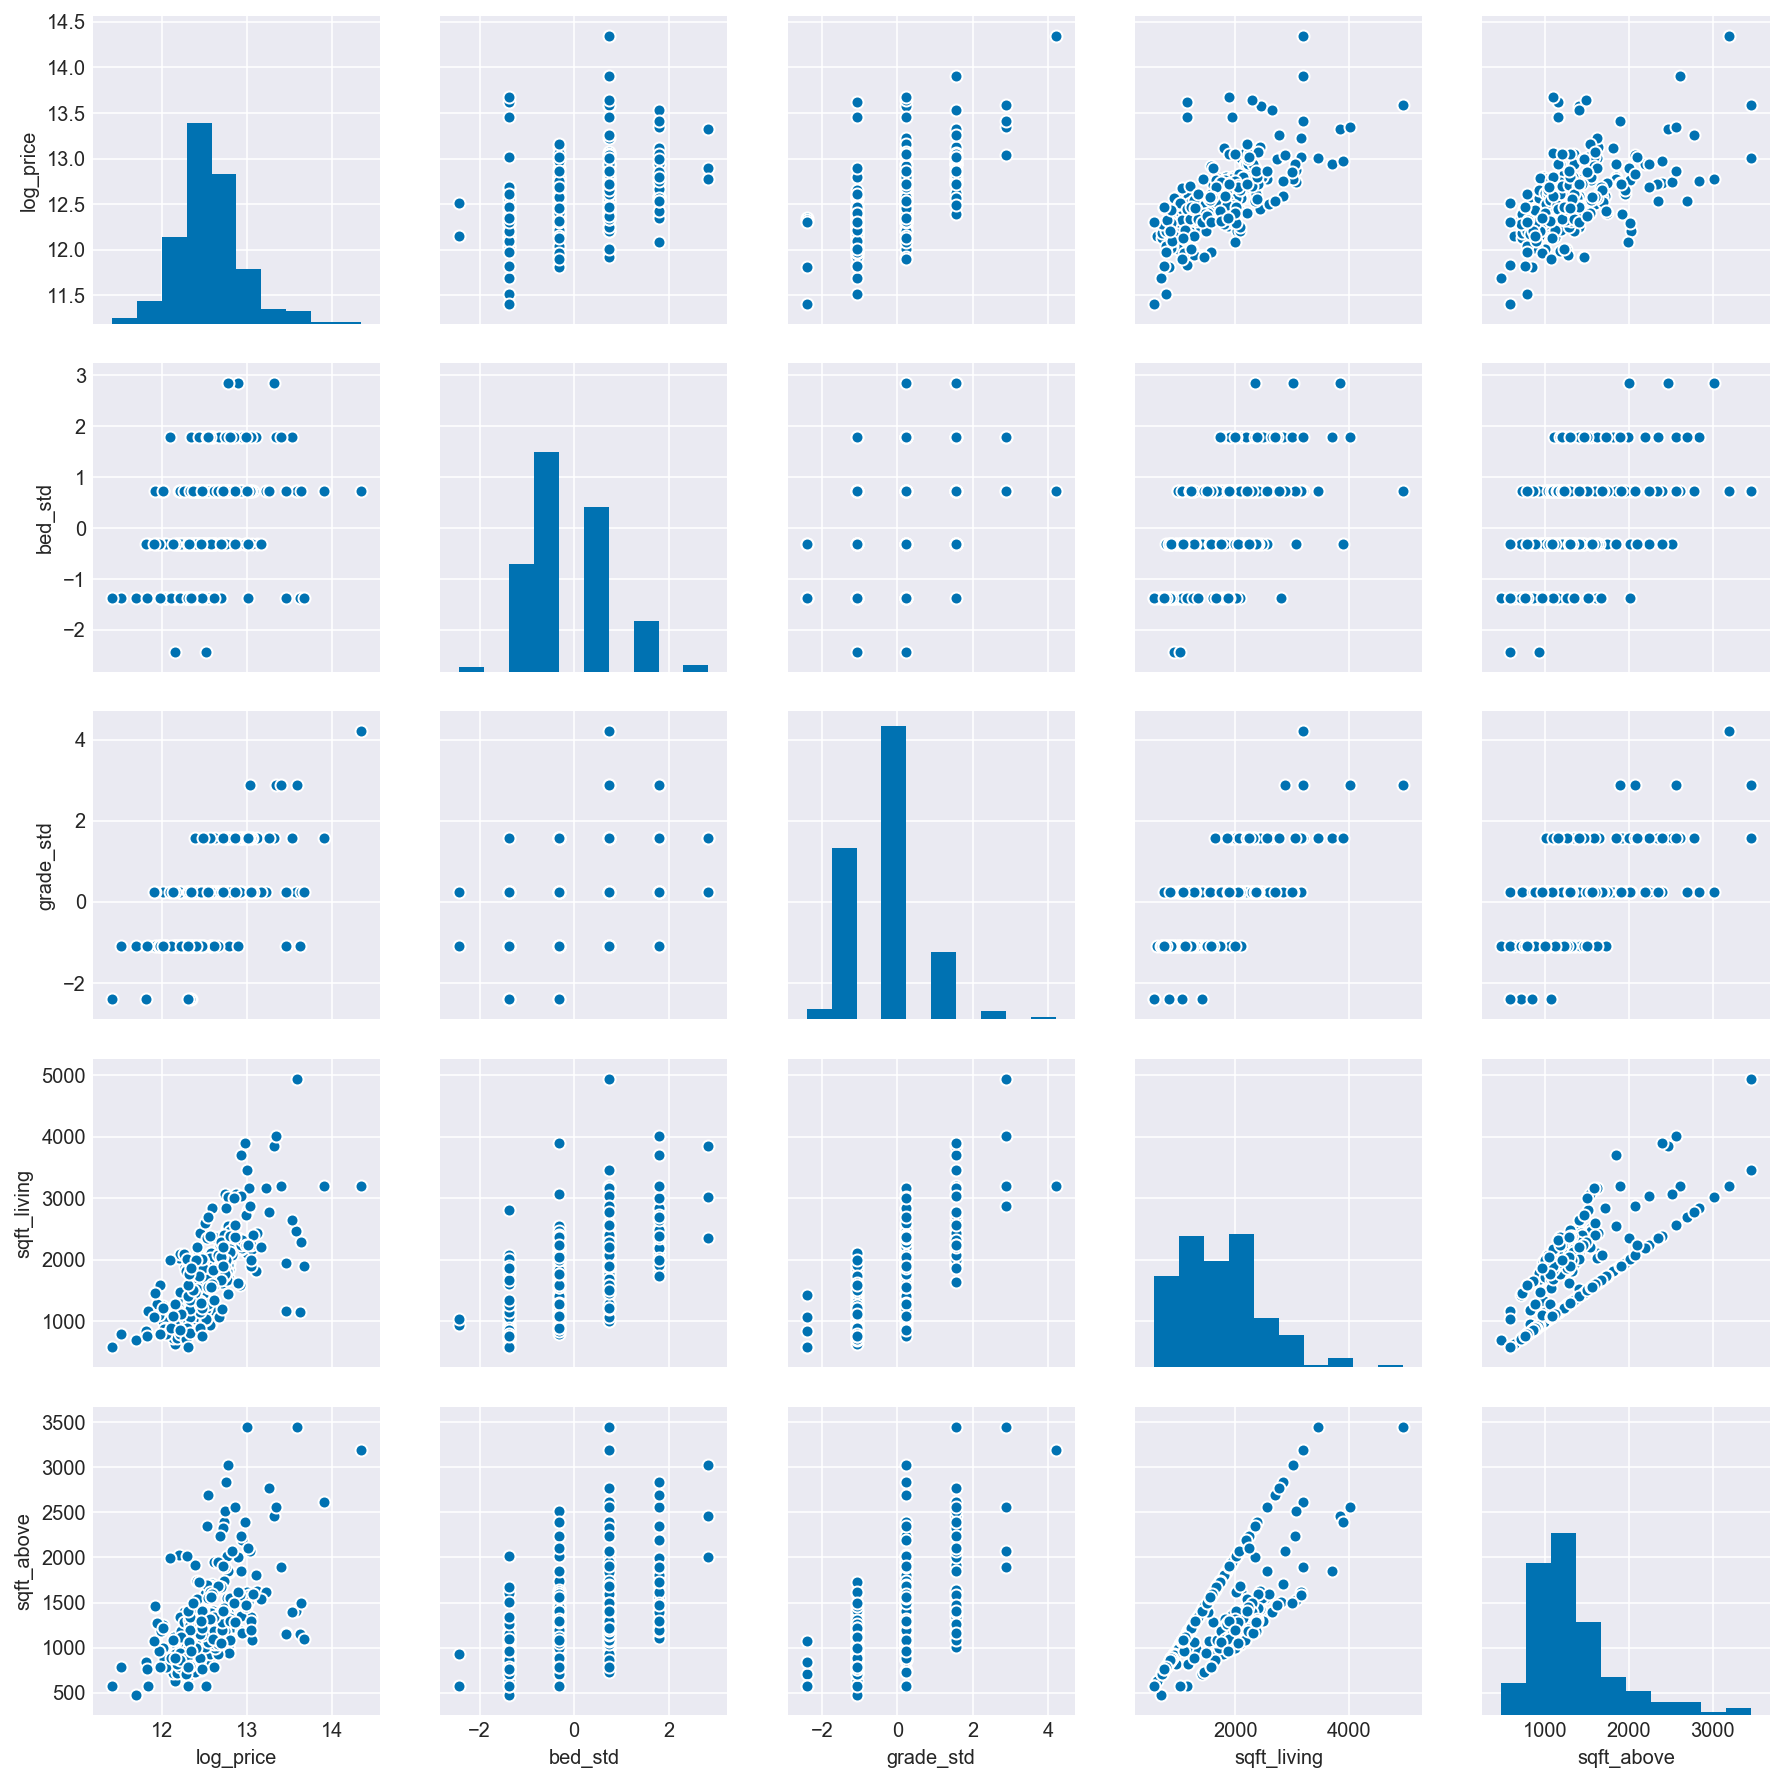

In [56]:
sns.pairplot(df, vars=['log_price','bed_std','grade_std','sqft_living','sqft_above']);

# `View` categories as predictor variables

In [26]:
df.view.value_counts()

0    206
2     29
4     11
3     11
1      5
Name: view, dtype: int64

**Convert the View categories to dummy variables**

In [27]:
dummies = pd.get_dummies(df['view'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.rename(columns = {1:'view_1', 2:'view_2', 3:'view_3', 4:'view_4'}, inplace=True)

In [28]:
with pm.Model() as model_5:
    a = pm.Normal('a', mu = 10, sd=5)
    b_1 = pm.Normal('b_1',mu = 10, sd=5)
    b_2 = pm.Normal('b_2',mu = 10, sd=5)
    b_3 = pm.Normal('b_3',mu = 10, sd=5)
    b_4 = pm.Normal('b_4',mu = 10, sd=5)

    mu = pm.Deterministic('mu', a + 
                          b_1 * df['view_1'] + 
                          b_2 * df['view_2'] +
                          b_3 * df['view_3'] + 
                          b_4 * df['view_4'])

    
    # instead of adding this as a deterministic when running the model 
    # it is possible to add them, after sampling using something like this
    # trace_5.add_values({'view_one', trace_5['a'] + trace_5['b_1']})
    view_zero = pm.Deterministic('view_zero', a + 0)
    view_one = pm.Deterministic('view_one', a + b_1)
    view_two = pm.Deterministic('view_two', a + b_2)
    view_three =  pm.Deterministic('view_three', a + b_3)
    view_four = pm.Deterministic('view_four', a + b_4)

    
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_5 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b_4, b_3, b_2, b_1, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:36<00:00, 327.86draws/s]


In [29]:
varnames = ['a','b_1', 'b_2', 'b_3','b_4','sigma']
pm.summary(trace_5, varnames, alpha=.11).round(3)[['mean', 'sd', 'hpd_5.5', 'hpd_94.5']]

,mean,sd,hpd_5.5,hpd_94.5
a,12.435,0.019,12.405,12.466
b_1,0.329,0.126,0.127,0.529
b_2,0.390,0.055,0.301,0.476
b_3,0.598,0.087,0.458,0.732
b_4,1.183,0.087,1.046,1.322
sigma,0.282,0.013,0.260,0.301


### `View` category variables + `Living Space` and `Grade` continuous variables

In [30]:
with pm.Model() as model_5_1:
    a = pm.Normal('a', mu=10, sd=5)
    bSQFTGRADE = pm.Normal('bSQFTGRADE', mu=0, sd=1, shape=2)
    b_1 = pm.Normal('b_1',mu = 10, sd=5)
    b_2 = pm.Normal('b_2',mu = 10, sd=5)
    b_3 = pm.Normal('b_3',mu = 10, sd=5)
    b_4 = pm.Normal('b_4',mu = 10, sd=5)
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    mu = pm.Deterministic('mu', a + 
                          b_1 * df['view_1'] + 
                          b_2 * df['view_2'] +
                          b_3 * df['view_3'] + 
                          b_4 * df['view_4'] +
                          bSQFTGRADE[0]*df.sqft_living_std + 
                          bSQFTGRADE[1]*df.grade_std)
    price = pm.Normal('price', mu=mu, sd=sigma, observed=df.log_price)
    trace_5_1 = pm.sample(4000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b_4, b_3, b_2, b_1, bSQFTGRADE, a]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 12000/12000 [00:53<00:00, 224.05draws/s]


In [31]:
varnames = ['a','bSQFTGRADE', 'b_1', 'b_2', 'b_3','b_4', 'sigma']
pm.summary(trace_5_1, varnames, alpha=.11).round(3)[['mean', 'sd', 'hpd_5.5', 'hpd_94.5']]

,mean,sd,hpd_5.5,hpd_94.5
a,12.481,0.015,12.458,12.504
bSQFTGRADE__0,0.152,0.019,0.120,0.180
bSQFTGRADE__1,0.079,0.019,0.051,0.110
b_1,0.149,0.094,0.008,0.306
b_2,0.247,0.042,0.180,0.314
b_3,0.249,0.067,0.141,0.355
b_4,0.900,0.067,0.794,1.006
sigma,0.204,0.009,0.189,0.218


## Visualizing Prediction Error

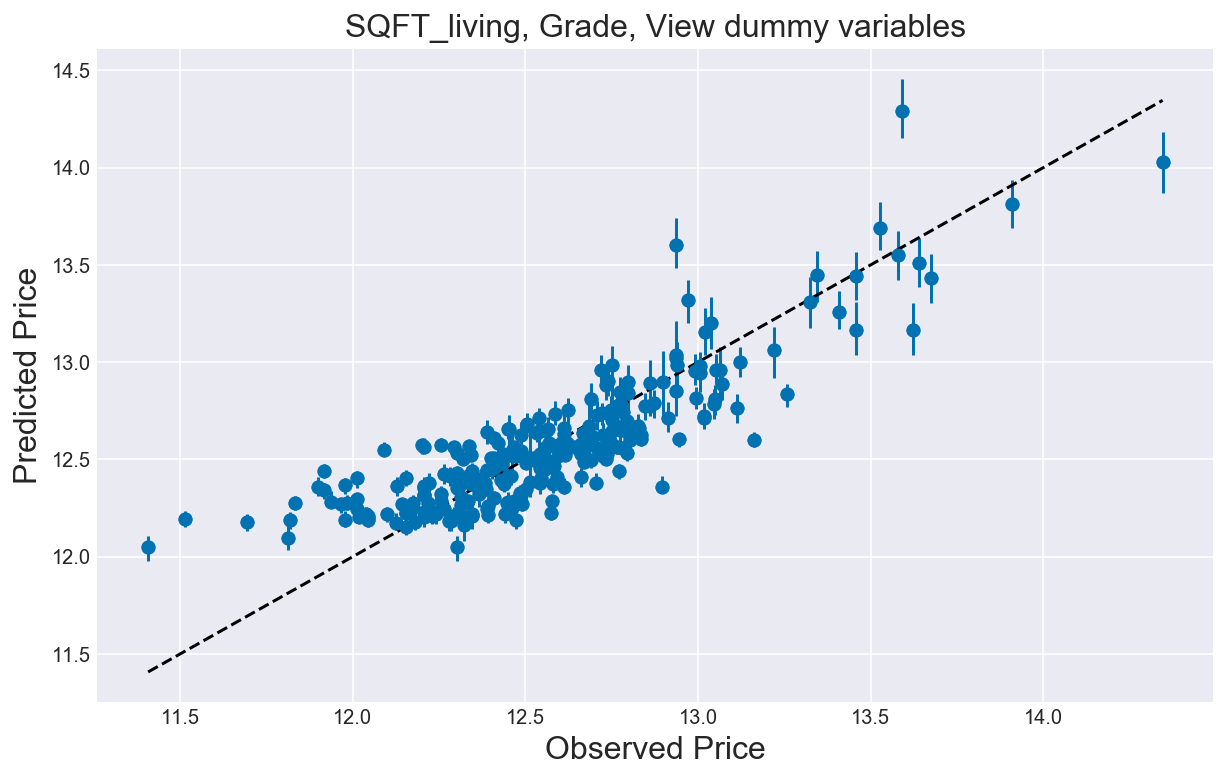

In [57]:
"""Multivariate Regression with 'living space', 'grade', and 'view' dummy variables as predictors"""

# 97% interval of the mean for Multivariate Regression
mu_pred_5_1= trace_5_1['mu']
mu_hpd_5_1 = pm.hpd(mu_pred_5_1, alpha=0.05)

# 97% prediction interval
price_pred_1 = pm.sample_ppc(trace_5_1, samples=1000, model=model_5_1)['price'] # simulate predictions
price_hpd_1 = pm.hpd(price_pred_1)

plt.figure(figsize=(10,6))
# Plot Prediction plot
plt.plot(df['log_price'], price_pred_1.mean(0), 'C0o')
plt.errorbar(df['log_price'], price_pred_1.mean(0), yerr=np.abs(price_pred_1.mean(0)-mu_hpd_5_1.T) , fmt='C0o')

min_x, max_x = df['log_price'].min(), df['log_price'].max()
plt.plot([min_x, max_x], [min_x, max_x], 'k--')
plt.xlabel("Observed Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)
plt.title("SQFT_living, Grade, View dummy variables", fontsize=16); 

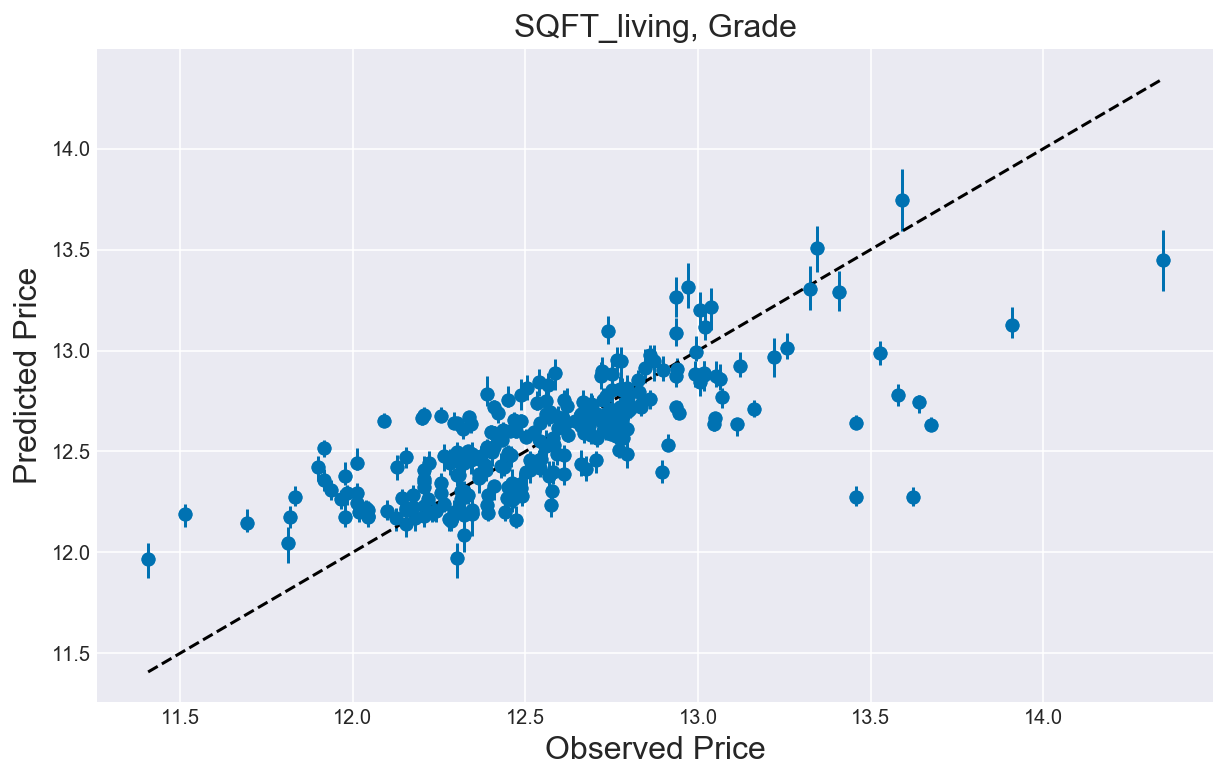

In [97]:
"""Multivariate Regression with 'living space' and 'grade' as predictors"""

# 97% interval of the mean for Multivariate Regression
mu_pred_2_1= trace_2_1['mu']
mu_hpd_2_1 = pm.hpd(mu_pred_2_1, alpha=0.05)

# 97% prediction interval
price_pred_2 = pm.sample_ppc(trace_2_1, samples=1000, model=model_2_1)['price'] # simulate predictions
price_hpd_2 = pm.hpd(price_pred_2)

plt.figure(figsize=(10,6))
# Plot Prediction plot
plt.plot(df['log_price'], price_pred_2.mean(0), 'C0o')
plt.errorbar(df['log_price'], price_pred_2.mean(0), yerr=np.abs(price_pred_2.mean(0)-mu_hpd_2_1.T) , fmt='C0o')

min_x, max_x = df['log_price'].min(), df['log_price'].max()
plt.plot([min_x, max_x], [min_x, max_x], 'k--')
plt.xlabel("Observed Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)
plt.title("SQFT_living, Grade", fontsize=16);

# change scale of ticks from log to normal

# at = np.arange(11, 15, .5)
# plt.xticks(at, np.exp(at).round(0))
# plt.yticks(at, np.exp(at).round(0));

**Summary:**

From the comparison above, it's evident that there are fewer prediction errors when we include the `view` dummy variables as categorical predictors in the multivariate regression

**To predict a hypothetical point**

In [114]:
# hypotheticallly view_0=1, sqft_living_std=-1, grade_std=-3
# view_0 doesn't exist; it is the intercept ('a'), so for it to equal 1, all the other views need to equal 0

trace_5_1['a'].mean() + trace_5_1['b_1'].mean()*0 + trace_5_1['b_2'].mean()*0 + \
trace_5_1['b_3'].mean()*0 + trace_5_1['b_4'].mean()*0 + trace_5_1['bSQFTGRADE'][0].mean()*-1 + \
trace_5_1['bSQFTGRADE'][1].mean()*-3

12.048312252833218